In [1]:
import os
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


# Set GPU device (use GPU 0)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Verify PyTorch is using GPU 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


GPU is available: NVIDIA GeForce RTX 2070 SUPER
Using device: cuda:0


In [2]:
# import json

# # Load the file from the directory
# with open('kaggle.json', 'r') as file:
#     data = json.load(file)

# # Access the content
# print(data)


In [3]:
# Next, install the Kaggle API client.
# !pip install -q kaggle

In [4]:
# import os
# import shutil

# # Define the source and target paths
# source_file = 'kaggle.json'  # File in the current directory
# target_dir = os.path.expanduser('~/.kaggle')  # Windows equivalent for the user's home directory

# # Create the target directory if it doesn't exist
# os.makedirs(target_dir, exist_ok=True)

# # Move the file to the target directory
# shutil.copy(source_file, target_dir)

# # Set appropriate permissions (optional on Windows but safe to include)
# kaggle_file_path = os.path.join(target_dir, 'kaggle.json')
# os.chmod(kaggle_file_path, 0o600)

# print(f"'{source_file}' has been moved to '{target_dir}' and permissions updated.")


In [5]:
# List available datasets.
# !kaggle datasets list

In [6]:
# Copy the stackoverflow data set locally.
# !kaggle datasets download -d debashishsau/aslamerican-sign-language-aplhabet-dataset

In [7]:
# import zipfile
# import os

# # Specify the filename of the uploaded .zip file
# zip_file = './aslamerican-sign-language-aplhabet-dataset.zip'  # Replace with your actual filename

# # Extract the .zip file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('dataset')  # Extract contents to the 'dataset' directory

# # List the contents to verify extraction

# print(os.listdir('dataset'))

In [8]:
import os
path = './dataset/ASL_Alphabet_Dataset/asl_alphabet_train'
print(os.listdir(path))

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


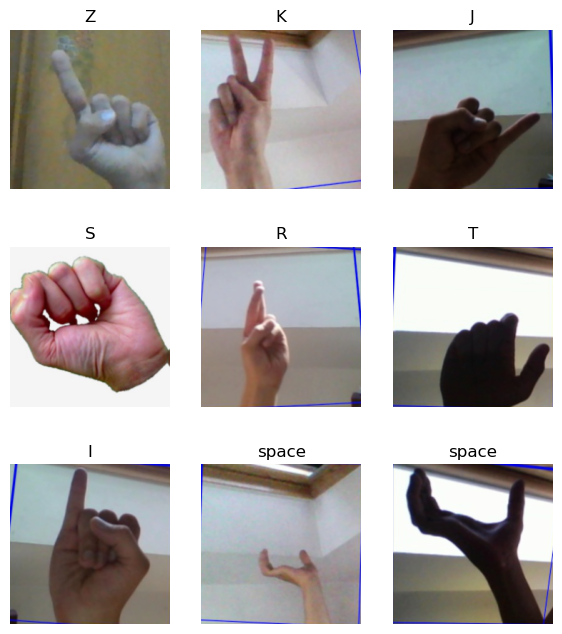

In [9]:
from fastai.vision.all import *

# Define the DataBlock
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image and label are the two components
    get_items=get_image_files,  # Retrieve all image files from the dataset path
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into train/validation sets
    get_y=parent_label,  # Labels are based on the parent folder name
    item_tfms=Resize(224, method='pad', pad_mode='zeros'),  # Resize with padding to avoid cropping important parts
    batch_tfms=aug_transforms(
        size=224,
        min_scale=0.9,         # Prevent aggressive cropping
        max_rotate=5,          # Limit random rotations to ±5 degrees
        max_warp=0.1,          # Reduce warping to preserve the gesture's structure
        flip_vert=False        # Disable vertical flips since they're irrelevant for ASL
    )
)

# Path to your dataset
path = './dataset/ASL_Alphabet_Dataset/asl_alphabet_train'

# Create DataLoaders
dls = datablock.dataloaders(path)

# Visualize a batch of images with transformations
dls.show_batch(max_n=9, figsize=(7, 8))


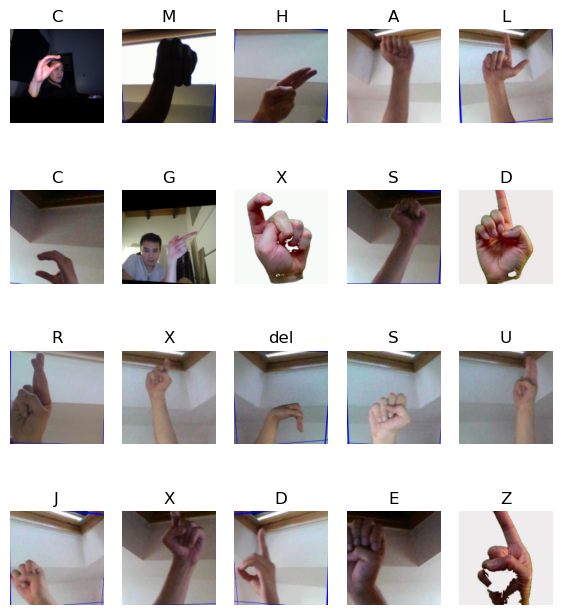

In [10]:
# Visualize a batch of images with transformations
dls.show_batch(max_n=20, figsize=(7, 8))


In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.to_fp16()
learn.model.to(device)  # Move model explicitly to GPU
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

E:\anaconda3\envs\cuda\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
E:\anaconda3\envs\cuda\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


E:\anaconda3\envs\cuda\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwarg

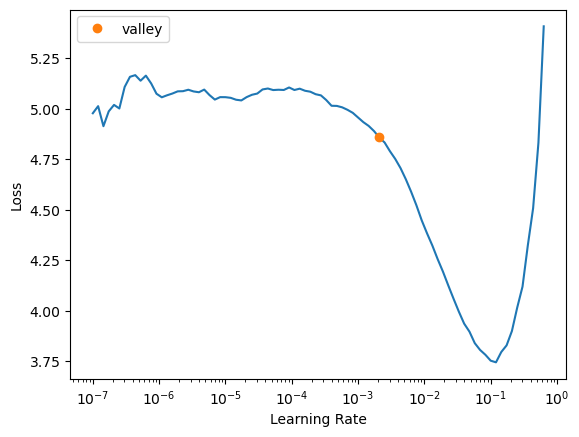

In [22]:
lr_Value = learn.lr_find()

In [23]:
lr_Value

SuggestedLRs(valley=0.0020892962347716093)

In [24]:
# Initial model creation
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.to_fp16()
# First training (before unfreezing) using the suggested LR from lr_find
learn.fit_one_cycle(3,lr_Value)

# Unfreeze the model to fine-tune
learn.unfreeze()



E:\anaconda3\envs\cuda\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,0.112921,0.053808,0.017595,30:27
1,0.050453,0.017177,0.005536,29:13
2,0.022893,0.010320,0.003295,33:01


In [39]:
lr_Value.valley

0.0020892962347716093

In [41]:
# Second training (after unfreezing) using a learning rate slice with adjusted range
learn.fit_one_cycle(4, lr_max=slice(1e-6,lr_Value.valley))  # Adjusted to fit the found LR

epoch,train_loss,valid_loss,error_rate,time
0,0.045209,0.028793,0.008204,25:42
1,0.016436,0.012846,0.004102,39:31
2,0.004269,0.005249,0.001457,30:37
3,0.001466,0.003496,0.000897,24:30


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

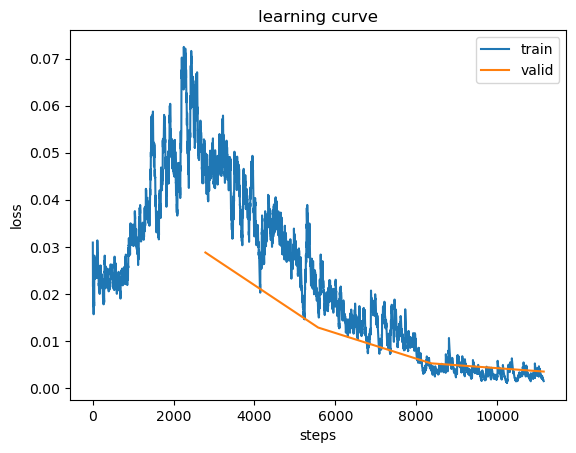

In [42]:
learn.recorder.plot_loss()

In [51]:
# # Export the model
learn.export('model.pkl')

# # Automatically trigger the download
# from IPython.display import display, Javascript

# def download_file(file_path):
#     display(Javascript(f"""
#         var link = document.createElement('a');
#         link.href = '{file_path}';
#         link.download = '{file_path.split('/')[-1]}';
#         document.body.appendChild(link);
#         link.click();
#         document.body.removeChild(link);
#     """))

# # Trigger download
download_file('model.pkl')

NameError: name 'download_file' is not defined

In [63]:
from fastai.learner import load_learner
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Step 1: Load the trained model
learn = load_learner('model.pkl')

# Step 2: Create an upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)  # Single image upload
display(upload)

# Step 3: Handle uploaded file and make predictions
def on_upload_change(change):
    for filename, fileinfo in upload.value.items():
        img = Image.open(fileinfo['content'])
        pred, pred_idx, probs = learn.predict(img)
        print(f"Prediction: {pred}")
        print(f"Confidence: {probs[pred_idx]:.4f}")

upload.observe(on_upload_change, names='value')


FileUpload(value=(), accept='image/*', description='Upload')

In [95]:
from fastai.learner import load_learner
from PIL import Image

# Step 1: Load the trained model
learn = load_learner('./model.pkl')

# Step 2: Load image from file (similar to loading JSON)
file_path = './N.jpeg'  # Replace with your image path

# Step 3: Open the image and make predictions
img = Image.open(file_path)  # Load the image using PIL
img = img.resize((224, 224))  # Resize to a size that fits the model input requirements

pred= learn.predict(img)

# Step 4: Print the results
print(f"Prediction: {pred}")


Prediction: ('T', tensor(19), tensor([4.1556e-02, 1.2181e-02, 1.9038e-02, 1.3858e-04, 1.1860e-02, 3.7820e-02,
        2.7142e-03, 6.6372e-03, 3.2559e-05, 1.0845e-04, 4.2333e-05, 2.9584e-03,
        1.1491e-04, 3.9962e-04, 8.1997e-04, 6.7122e-04, 5.1220e-03, 1.4214e-05,
        5.6355e-02, 7.3188e-01, 2.9295e-04, 4.9407e-03, 4.1093e-02, 5.3318e-05,
        6.5119e-05, 3.0464e-04, 2.1793e-02, 7.0103e-04, 2.9305e-04]))
